- **Stacking:** combining the outcomes of several base models using another model that is trained based on the outputs of the base models along with the desired outcome
- **Bagging:** training and combining predictions of multiple base models that are trained individually on copies of the original training data that are created by a specific random resampling known as bootstrap
- **Random forest:** specific modification of bagging when applied to decision trees
- **Pasting:** randomly pick modest-size subsets of a large training data, train a predictive model on each, and aggregate the predictions
- **Boosting:** a sequence of weak models are trained and combined to make predictions

### 8.1 A General Perspective on the Efficacy of Ensemble Learning

Suppose we have a number of i.i.d. random variables $Y_1, Y_2, ..., Y_N$ with mean $\mu$ and variance $\sigma^2$:
- i.e. $E[Y_i] = \mu$ and $\text{Var}[Y_i] = \sigma^2, i = 1, \dots, N$

Using $Y_i$ as estimator of $\mu$ has a standard deviation of $\sigma$

If we use sample mean $\frac{1}{N} \sum^{N}_{i=1}{Y_i}$ as the estimator of $\mu$, we have $\text{Var}[\frac{1}{N} \sum^{N}_{i=1}{Y_i}] = \frac{N \sigma^2}{N^2} = \frac{\sigma^2}{N}$:
- it has a standard deviation of $\frac{\sigma}{\sqrt{N}} < \sigma$ for $N>1$
- combining $Y_1, Y_2, ..., Y_N$ by an averaging operator creates an estimator that has a higher "precision" (lower variance) thatn the utility of each $Y_i$ in its "silo"

#### 8.1.1 Bias-Variance Decomposition

Consider a regression problem in which we wish to estimate the value of a target random variable $Y$ for an input feature vector $\mathbf{X}$. 

Even if we have infinite number of data points from the problem and we train a specific model, in general we would still have error in predicting $Y$ because we approximated the underlying phenomenon connecting $\mathbf{X}$ to $Y$ by a specific mathematical model.

$Y = f_o(\mathbf{X}) + \epsilon$
- $f_o(\mathbf{X})$: best (optimal) approximation of $Y$ that we can achieve by using a class of models
- $\epsilon$: unknown zero-mean error term (because any other mean can be considered as a biased term added to $f_o(\mathbf{X})$ itself). AKA irreducible error

We are always working with a finite training data and what we end up with instead is indeed an estimation of $f_o(\mathbf{X})$ denoted by $f(\mathbf{X})$

MSE of $f(\mathbf{X})$ with respect to unknown $Y$:

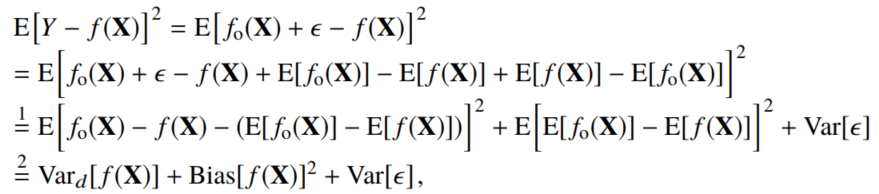

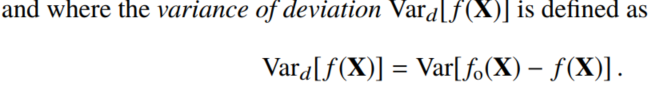

Generally, the more complex the model, the larger the variance of deviation:
- For a complex learning algorithm with many degrees of freedom, Model A (Dataset A) and Model B (Dataset B) could be very different
- A simpler model (less degree of freedom) does not change as much (by definition has less flexibility) so the variance of deviation could naturally be lower

It is more likely that a complex learning algorithm has lower bias than a simpler learning algorithm

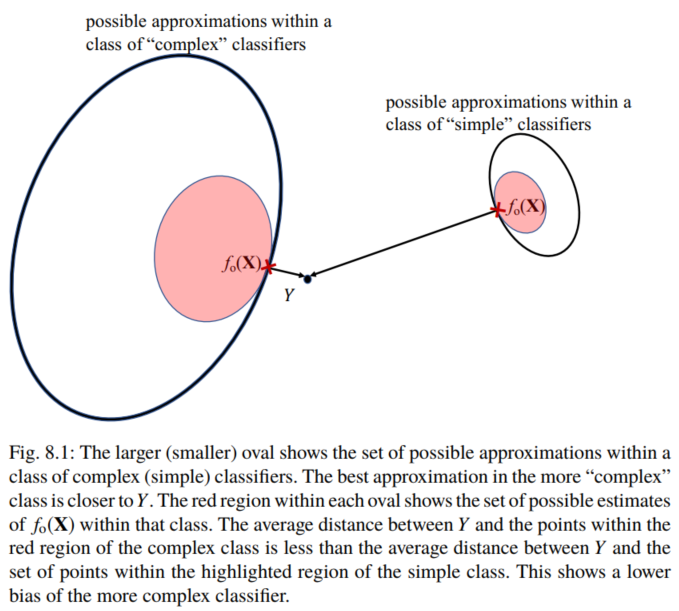

Ensemble methods generally benefit from reducing the variance of deviation
discussed above (for example, bagging, random forests, and stacking) although some
methods such as boosting benefit from both reduction in variance and bias.

#### 8.1.2 How Would Ensemble Learning Possibly Help?

We focus on the possibility of reducing $\text{Var}_{d} [f(\mathbf{X})]$

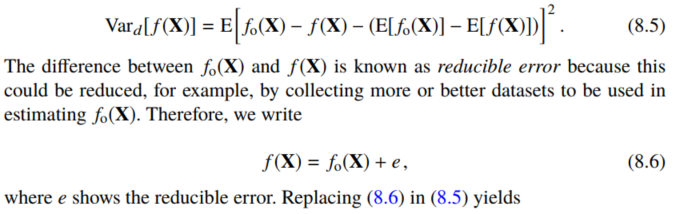

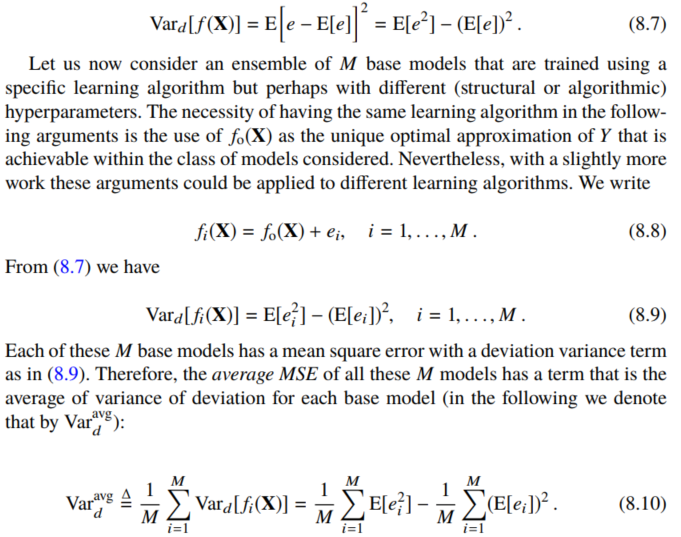

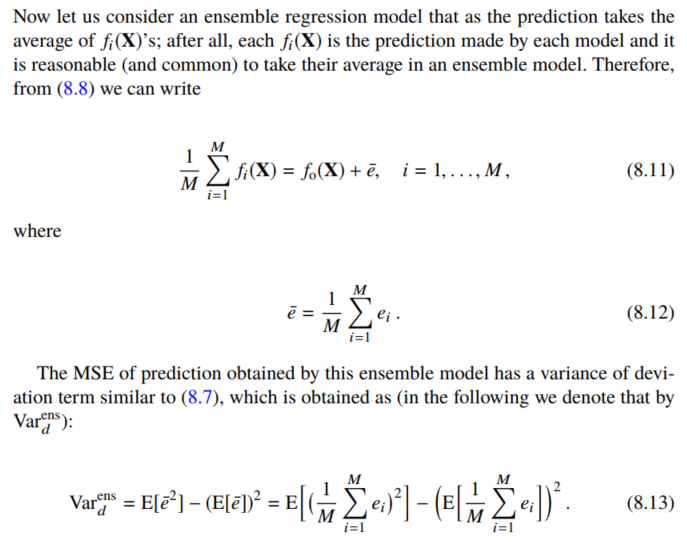

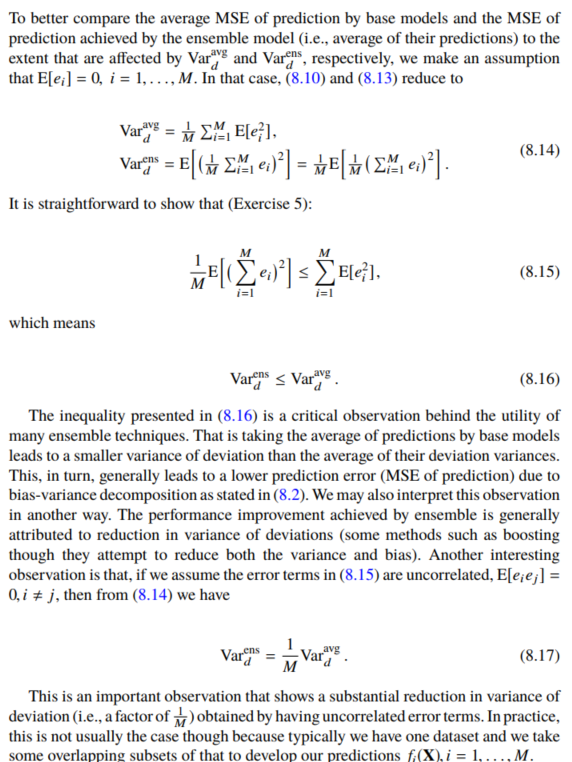

### 8.2 Stacking

Stacked ensemble learning (aka stacked generalization):
- Combining the outcomes of $N$ base models (aka level-0 generalizers) using another model (level-1 generalizer) that is trained based on the outputs of the base models along with the desired outcome

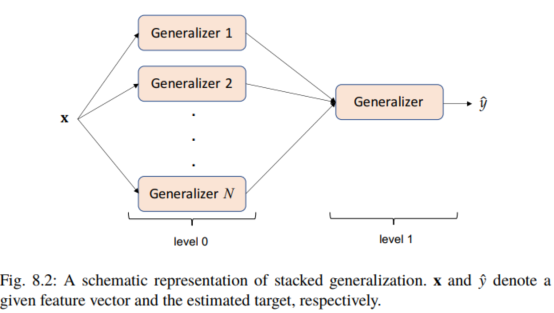

### 8.3 Bagging

Bagging (**B**ootstrap **agg**regat**ing**)

We know that the decision regions of decision trees could be quite sensitive with respect to changes in data. One question is whether we can systematically improve the robustness of some classifiers based on decision trees that are more robust with respect to variation in data:
1. What is meant by variation in data and how can we simulate that?
- Assume some observations are repeated
- To create each new dataset, we randomly draw with replacement $n$ observations from the original dataset. 
- Keeping the same sample size $n$ implies some observations from the original training dataset do not appear in these new datasets
- These newly generated datasets (i.e. from sampling the orignal dataset with replacement while keeping the same sample size) are known as *bootstrap samples*
2. How can we possibly improve the robustness?
- We train a decision tree on each bootstrap sample
- For a given feature vector $\mathbf{x}$, each tree produces a prediction
- Then aggregate these predictions to create a final prediction
- The aggreagation operation could be the majority vote for classificaiton and the averaging for regression
- We capture more variation of data in the aggregated model

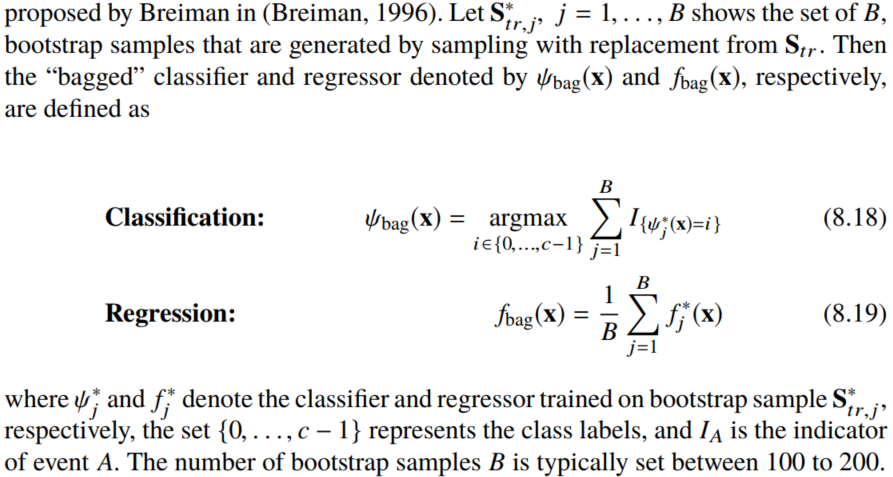

When we train each base estimator on a different subset of features and samples, the method is referred to *random patches* ensemble

### 8.4 Random Forest

Random forest is similar to bagged decision trees (obtained by using decision trees as base models used in bagging)

Decision Trees:
- For each split, we examine all features and pick the split that maximized the impurity drop
- This process is then continued until one of split-stopping criteria is met

Random Forest:
- For each split in training a decision tree on a bootstrap sample, $d \leq p$ features are randomly picked as a candidate feature set and the best split is the one that maximized the impurity drop over this candidate feature set
- $d$ is typically set as $\sqrt{p}$ or $\log_{2}{p}$
- It decorrelate trees in random forest as compared with bagged trees (having uncorrelated error terms in the ensemble leads to substantial reduction in variance of deviation)

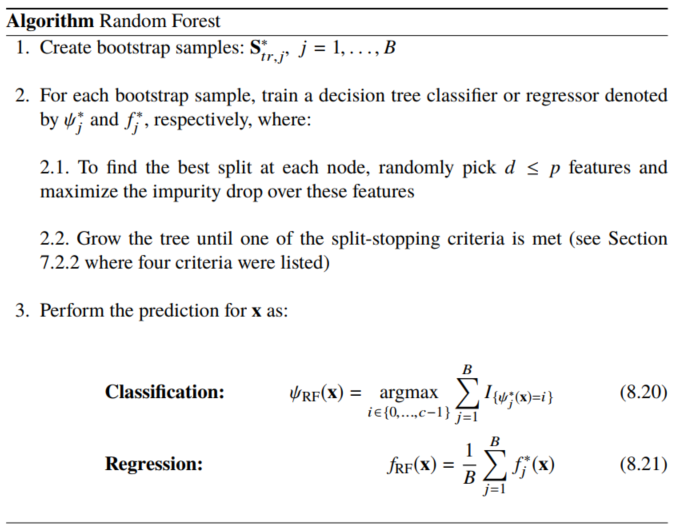

### 8.5 Pasting

Sample subset being drawn randomly **without** replacement

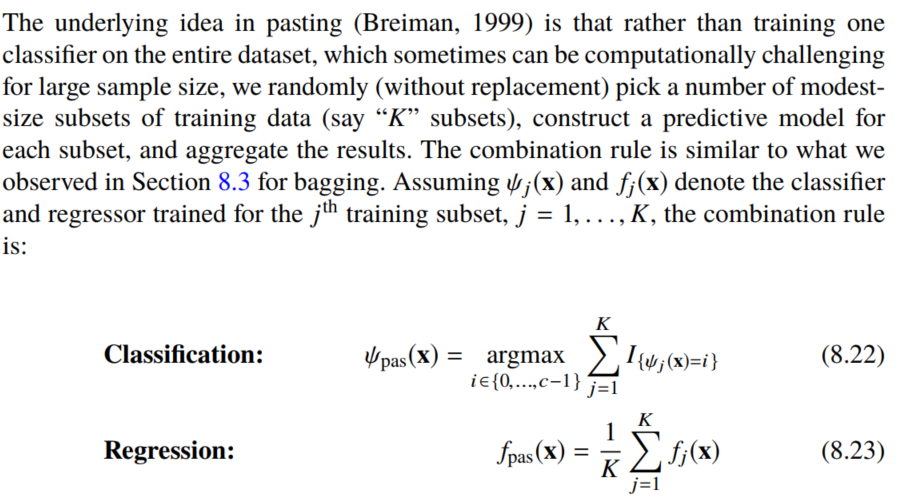

### 8.6 Boosting

#### 8.6.1 AdaBoost

A weak classifier is a model with a performance slighty better than random guessing
- e.g. for binary classification "accuracy better than 0.5"

AdaBoost (**Ada**ptive **Boost**ing): to make the classifier trained at iteration $m+1$ focuses more on observations that are misclassified by the classifier trained at iteration $m$
- A sequence of weak learners are trained on a series of iteratively weighted training data
- The weight of each observation at each iteration depends on the performance of the trained model at the previous iteration
- After a certain number of iterations, these models are then combined to make a prediction 

AdaBoost.SAMME (Stagewise Additive Modeling using a Multi-class Exponential Loss Function):
- Suppose a sample of size $n$ collectedo from $c$ classes, and a learning algorithm that can handle multiclass classification and supports weighted samples

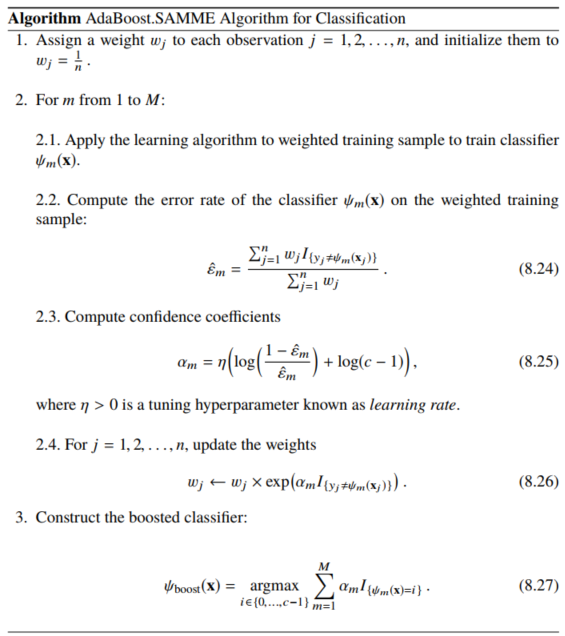

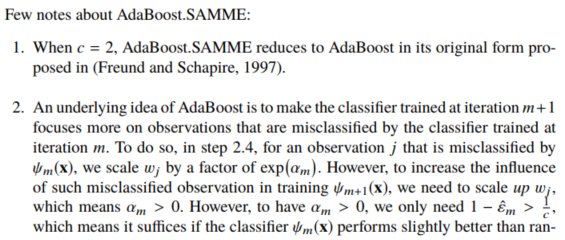

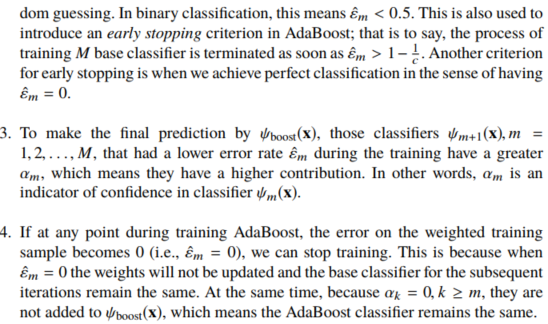

AdaBoost.R2 for regression  (A modification of AdaBoost.R, "average loss less than 0.5"):

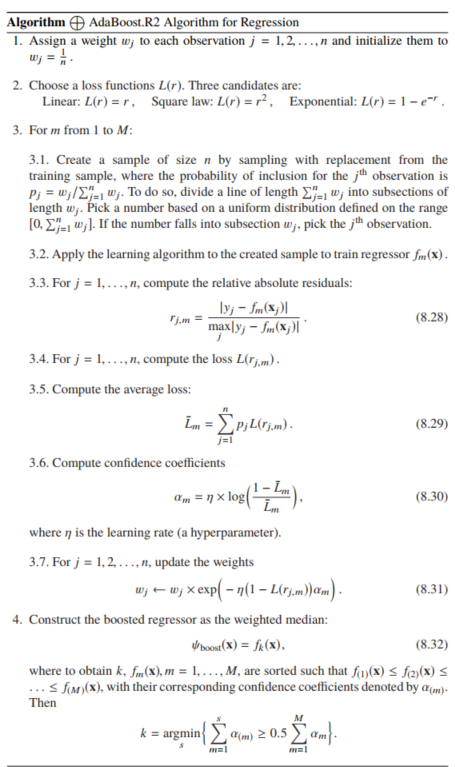

#### 8.6.2 Gradient Boosting

- $h_m(\mathbf{x})$: basis function
- $\beta_m$: step size

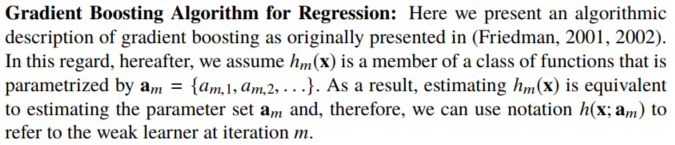

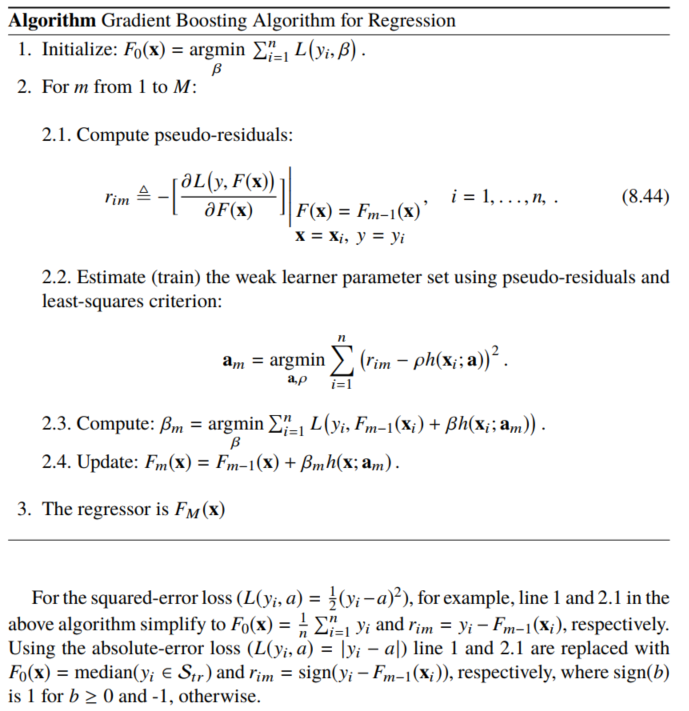

#### 8.6.3 Gradient Boosting Regression Trees

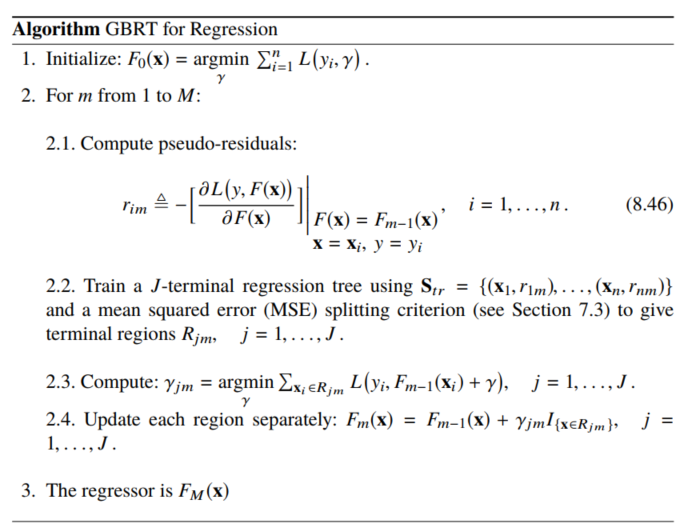

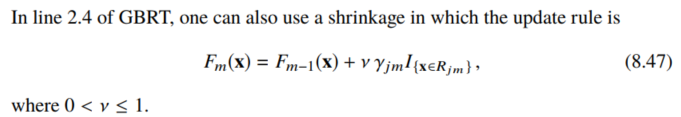

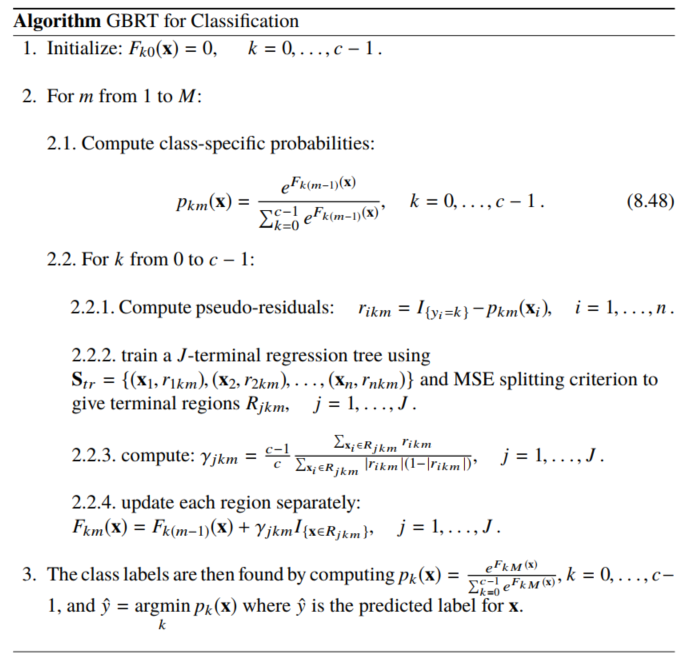

#### 8.6.4 XGBoost

XGBoost (e**X**treme **G**radient **Boost**ing)

Two properties that distinguish XGBoost from GBRT:
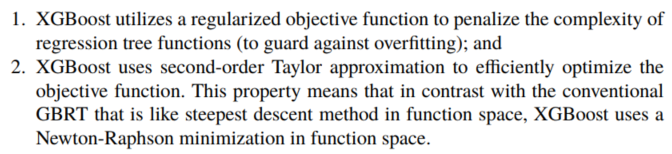

$\gamma, \lambda$ are two tuning parameters

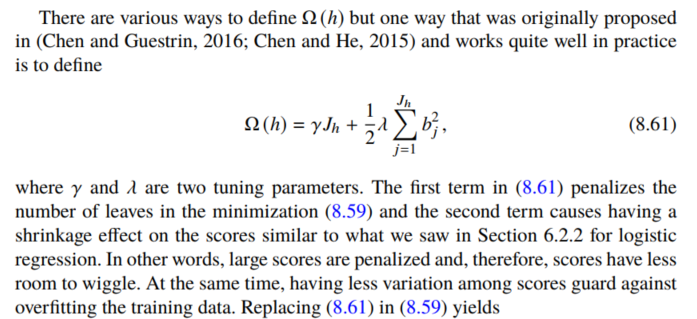

$\gamma$ as the minimum gain required to split a node

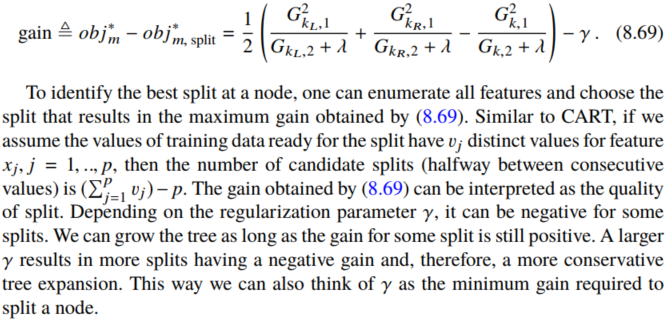